In [44]:
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
sales_df = pd.read_csv("sales_data.csv")

# Display the first five rows
print(sales_df.head())

         Date     Store         City  Revenue Product Category  Quantity  \
0  2023-04-13   Store_2      Phoenix      321             Toys         2   
1  2024-03-11  Store_10      Houston     1513        Groceries         8   
2  2023-12-15   Store_2  Los Angeles     1821        Furniture         9   
3  2023-09-28  Store_10  Los Angeles     1312         Clothing         7   
4  2023-04-17   Store_1      Chicago      426         Clothing         3   

   Employees  Transactions  Payment Method  Discount  Customer_Age  \
0         28            17  Online Payment     13.82            27   
1          6            36  Online Payment     21.60            56   
2         26            19      Debit Card     49.02            45   
3          7            64     Credit Card      3.38            66   
4         16            91  Online Payment     25.94            53   

  Customer_Gender  
0      Non-binary  
1      Non-binary  
2      Non-binary  
3          Female  
4            Male  


In [57]:
# Check for missing values
print(sales_df.isnull().sum())

Date                0
Store               0
City                0
Revenue             0
Product Category    0
Quantity            0
Employees           0
Transactions        0
Payment Method      0
Discount            0
Customer_Age        0
Customer_Gender     0
dtype: int64


In [58]:
sales_df = sales_df.dropna()  # Drop rows with missing values

In [59]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

In [60]:
sales_df = sales_df.drop_duplicates()

In [62]:
#Total Transactions Recorded
print(sales_df.shape[0])

500


In [63]:
# Store Location with Highest Sales
print(sales_df.groupby('Store')['Revenue'].sum().idxmax())

Store_10


In [65]:
# Top 5 Cities in Terms of Sales
print(sales_df.groupby('City')['Revenue'].sum().sort_values(ascending=False).head(5))

City
Chicago        107678
New York       106089
Los Angeles    104965
Phoenix         98623
Houston         93171
Name: Revenue, dtype: int64


In [67]:
# Most Sold Product Category
print(sales_df.groupby('Product Category')['Quantity'].sum().idxmax())

Clothing


In [68]:
# Store with Highest Average Transaction Value

print(sales_df.groupby('Store')['Revenue'].mean().idxmax())


Store_6


In [69]:
# Total Sales by Store 
print(sales_df.groupby('Store')['Revenue'].sum())

Store
Store_1     61734
Store_10    78093
Store_2     46645
Store_3     48520
Store_4     39991
Store_5     64218
Store_6     51657
Store_7     45679
Store_8     35540
Store_9     38449
Name: Revenue, dtype: int64


In [70]:
# Stores with Lowest Revenue
print(sales_df.groupby('Store')['Revenue'].sum().sort_values().head())


Store
Store_8    35540
Store_9    38449
Store_4    39991
Store_7    45679
Store_2    46645
Name: Revenue, dtype: int64


In [72]:
# Revenue Per Employee
sales_df['Revenue_per_Employee'] = sales_df['Revenue'] / sales_df['Employees']
print(sales_df[['Store', 'Revenue_per_Employee']].drop_duplicates())

        Store  Revenue_per_Employee
0     Store_2             11.464286
1    Store_10            252.166667
2     Store_2             70.038462
3    Store_10            187.428571
4     Store_1             26.625000
..        ...                   ...
495   Store_8            158.777778
496   Store_1             66.727273
497   Store_3             79.080000
498  Store_10            150.500000
499   Store_9            189.333333

[500 rows x 2 columns]


In [75]:
# City with Highest Number of Transactions
print(sales_df['City'].value_counts().idxmax())

Chicago


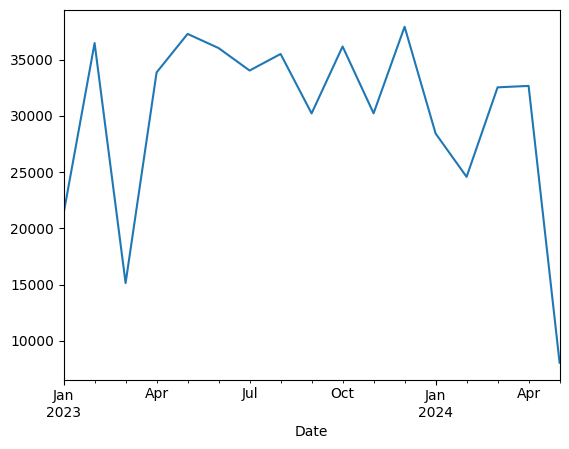

In [77]:
# Revenue Trend Over Time
sales_df.groupby(sales_df['Date'].dt.to_period('M'))['Revenue'].sum().plot()
plt.show()

In [84]:
# Best-Selling Product
if 'Product Category' in sales_df.columns and 'Quantity' in sales_df.columns:
    print(sales_df.groupby('Product Category')['Quantity'].sum().idxmax())
else:
    print("Error: Column 'Product' or 'Quantity' not found in dataset")

Clothing


In [85]:
# Store with Highest Foot Traffic
print(sales_df.groupby('Store')['Transactions'].sum().idxmax())

Store_10


In [86]:
# Average Revenue Per Transaction

print(sales_df['Revenue'].mean())

1021.052


In [88]:
# Month with Highest Sales
print(sales_df.groupby(sales_df['Date'].dt.month)['Revenue'].sum().idxmax())

4


In [89]:
# Day of the Week with Highest Sales
sales_df['Day_of_Week'] = sales_df['Date'].dt.day_name()
print(sales_df.groupby('Day_of_Week')['Revenue'].sum().idxmax())

Monday


In [91]:
# Sales Comparison Between Weekdays and Weekends
sales_df['Weekday'] = sales_df['Date'].dt.weekday
sales_df['Is_Weekend'] = sales_df['Weekday'] >= 5
print(sales_df.groupby('Is_Weekend')['Revenue'].sum())

Is_Weekend
False    352375
True     158151
Name: Revenue, dtype: int64


In [93]:
# Total Revenue by Payment Method
print(sales_df.groupby('Payment Method')['Revenue'].sum())

Payment Method
Cash              130059
Credit Card       141408
Debit Card        104139
Online Payment    134920
Name: Revenue, dtype: int64


In [94]:
# Correlation Between Discount and Revenue
print(sales_df[['Discount', 'Revenue']].corr())

          Discount   Revenue
Discount  1.000000  0.033525
Revenue   0.033525  1.000000


## Step 4: Sales Trends Analysis
### Monthly Sales Trend

Month
1     49762
2     61056
3     47679
4     66539
5     45342
6     36034
7     34038
8     35510
9     30224
10    36176
11    30232
12    37934
Name: Revenue, dtype: int64


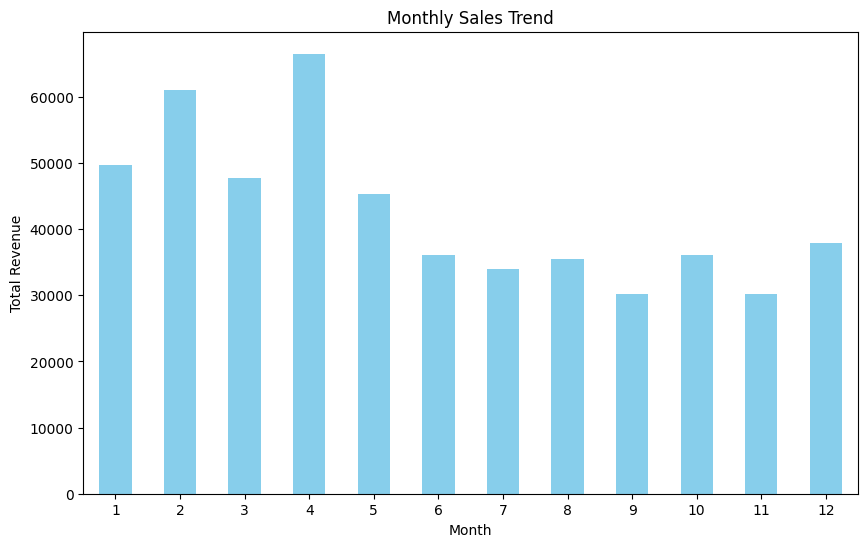

In [97]:
# Convert the 'Date' column to datetime
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

# Extract the month from the 'Date' column
sales_df['Month'] = sales_df['Date'].dt.month

# Group by month and calculate the total sales for each group
monthly_sales = sales_df.groupby('Month')['Revenue'].sum()

# Print the monthly sales
print(monthly_sales)

# Plot the monthly sales trend
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()

In [98]:
# Find the best performing month
best_month = monthly_sales.idxmax()
best_month_sales = monthly_sales.max()

# Find the worst performing month
worst_month = monthly_sales.idxmin()
worst_month_sales = monthly_sales.min()

print(f"Best Performing Month: {best_month} with Total Revenue: {best_month_sales}")
print(f"Worst Performing Month: {worst_month} with Total Revenue: {worst_month_sales}")

Best Performing Month: 4 with Total Revenue: 66539
Worst Performing Month: 9 with Total Revenue: 30224


In [99]:
# Group by store and calculate the total sales for each group
store_sales = sales_df.groupby('Store')['Revenue'].sum()

# Find the best performing store
best_store = store_sales.idxmax()
best_store_sales = store_sales.max()

print(f"Best Performing Store: {best_store} with Total Revenue: {best_store_sales}")

Best Performing Store: Store_10 with Total Revenue: 78093


Customer_Gender
Female         971.395210
Male          1073.668790
Non-binary    1021.232955
Name: Revenue, dtype: float64


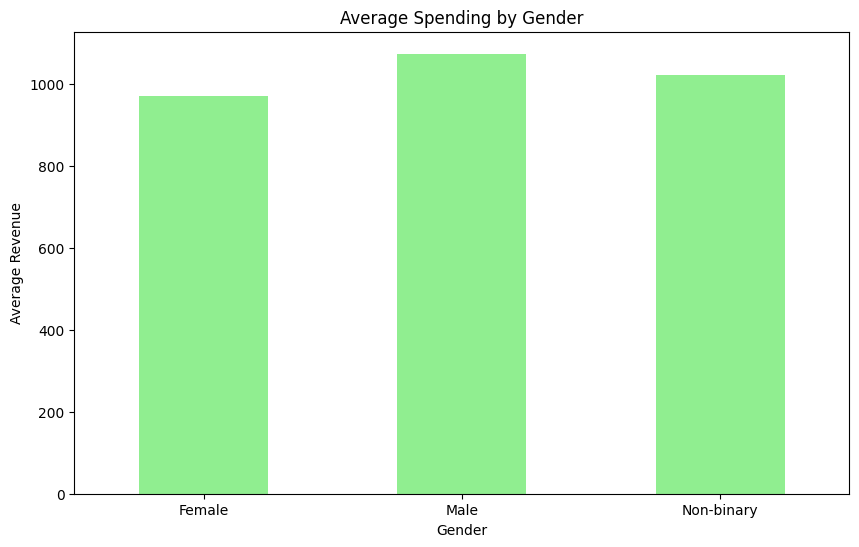

In [101]:
# Group by gender and calculate the average spending for each group
average_spending_by_gender = sales_df.groupby('Customer_Gender')['Revenue'].mean()

# Print the average spending by gender
print(average_spending_by_gender)

# Plot the average spending by gender
plt.figure(figsize=(10, 6))
average_spending_by_gender.plot(kind='bar', color='lightgreen')
plt.title('Average Spending by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Revenue')
plt.xticks(rotation=0)
plt.show()

In [107]:
# Age Group with Highest Spending
age_groups = pd.cut(sales_df['Customer_Age'], bins=[18, 25, 35, 50, 65, 80], labels=['18-25', '26-35', '36-50', '51-65', '66-80'])
age_spending = sales_df.groupby(age_groups)['Revenue'].sum()
print(age_spending)

Customer_Age
18-25     62753
26-35    107552
36-50    141130
51-65    151285
66-80     39617
Name: Revenue, dtype: int64


C:\Users\comp\AppData\Local\Temp\ipykernel_11844\835674942.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spending = sales_df.groupby(age_groups)['Revenue'].sum()


Best Performing Month: 4 with Total Revenue: 66539
Worst Performing Month: 9 with Total Revenue: 30224
Best Performing Store: Store_10 with Total Revenue: 78093
Customer_Gender
Female         971.395210
Male          1073.668790
Non-binary    1021.232955
Name: Revenue, dtype: float64


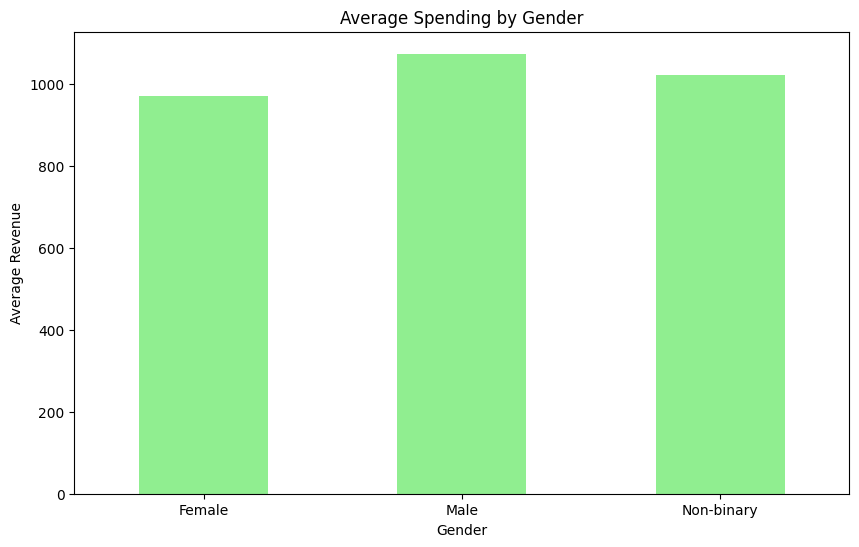

Customer_Age
18-25     62753
26-35    107552
36-50    141130
51-65    151285
66-80     39617
Name: Revenue, dtype: int64


C:\Users\comp\AppData\Local\Temp\ipykernel_11844\164919779.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spending = sales_df.groupby(age_groups)['Revenue'].sum()


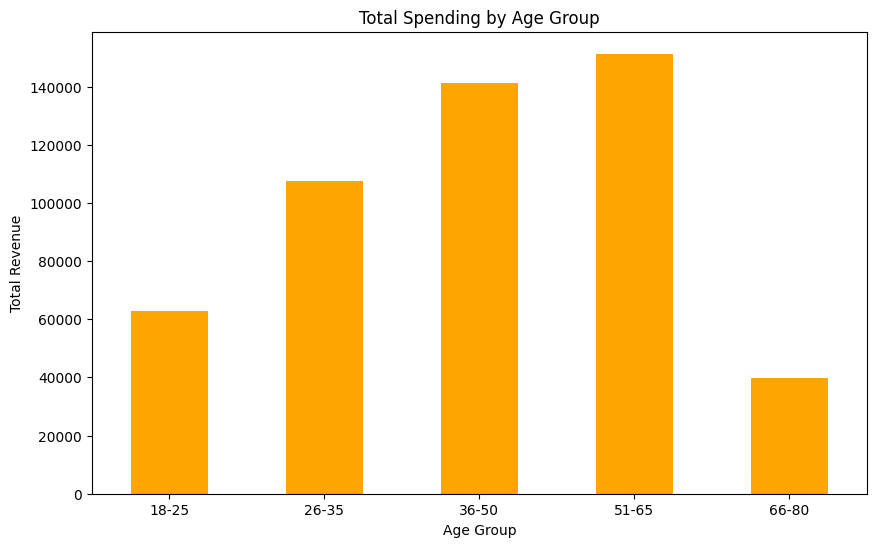

Age Group with Highest Spending: 51-65 with Total Revenue: 151285


In [108]:
# Find the best and worst performing months
best_month = monthly_sales.idxmax()
best_month_sales = monthly_sales.max()
worst_month = monthly_sales.idxmin()
worst_month_sales = monthly_sales.min()

print(f"Best Performing Month: {best_month} with Total Revenue: {best_month_sales}")
print(f"Worst Performing Month: {worst_month} with Total Revenue: {worst_month_sales}")

# Group by store and calculate the total sales for each group
store_sales = sales_df.groupby('Store')['Revenue'].sum()

# Find the best performing store
best_store = store_sales.idxmax()
best_store_sales = store_sales.max()

print(f"Best Performing Store: {best_store} with Total Revenue: {best_store_sales}")

# Group by gender and calculate the average spending for each group
average_spending_by_gender = sales_df.groupby('Customer_Gender')['Revenue'].mean()

# Print the average spending by gender
print(average_spending_by_gender)

# Plot the average spending by gender
plt.figure(figsize=(10, 6))
average_spending_by_gender.plot(kind='bar', color='lightgreen')
plt.title('Average Spending by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Revenue')
plt.xticks(rotation=0)
plt.show()

# Define age groups
age_groups = pd.cut(sales_df['Customer_Age'], bins=[18, 25, 35, 50, 65, 80], labels=['18-25', '26-35', '36-50', '51-65', '66-80'])

# Group by age group and calculate the total spending for each group
age_spending = sales_df.groupby(age_groups)['Revenue'].sum()

# Print the total spending by age group
print(age_spending)

# Plot the total spending by age group
plt.figure(figsize=(10, 6))
age_spending.plot(kind='bar', color='orange')
plt.title('Total Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()

# Find the age group with the highest spending
highest_spending_age_group = age_spending.idxmax()
highest_spending_age_group_sales = age_spending.max()

print(f"Age Group with Highest Spending: {highest_spending_age_group} with Total Revenue: {highest_spending_age_group_sales}")